# Les optimisations en gestion de projet

# Introduction 
Dans certains cas, il s'agit d'optimisations de type Ordonnancement, mais appliqués à la gestion de projet, dans d'autres cas, il peut s'agit d'appliquer un modèle Knapsack afin de maximiser la performance d'une équipe par exemple. Des modèles de selection avec des variables conditionnelles binaires peuvent aussi être utilisées.

Paramêtres et vocabulaires souvent utilisés:

- Durée de la tâche : La tâche a une durée précise, l'ensemble des tâches constitue le projet.

- Prédécesseurs : une tâche doit être réalisée après ces prédécesseurs.

- Date due : une tâche doit forcément être réalisée à la date T, sinon, elle est en retard.

- Somme des retards : Si les tâches ont du retard, et ne peuvent être simultanées, on calcule la somme des retards que l'on cherche à minimiser.

- Temps d'exécution totale du projet.

Techniques fameuses : 
 - Minimisation de temps de projet MPM et (je sais plus)


Etude globale proposée par <b>Estelle Derrien - Github Estelle15000</b>

*** CREATION EN COURS ***


# Sommaire

- 1. Ordonnancement de projet
        - Notre problème de base
        - Modélisation mathématique
        - Résolution avec les solveurs
             - Solveur Cplex
             - Solveur Python Mip
             - Solveur Google Or
             - Solveur Pulp
- 2. Création d'équipes
        - Notre problème de base
        - Modélisation mathématique
        - Résolution
- 3. Data envelopment analysis (DEA - Taylor book)
        - Notre problème de base ( Déterminer l'efficacité dun système en le comparant aux autres)
        - Modélisation mathématique
        - Résolution


# 1. Ordonnancement de projet

# Introduction 

Pour notre projet, on a n tâches, qui ont m prédecesseurs .
Il faut minimiser le temps global d'exécution du projet. 

# Notre problème de base .

Je construis une maison, et j'ai 10 tâches à effectuer :

In [12]:
# - maconnerie =  temps : 35  
# - charpente =   temps : 15  - Prédécesseurs : maçonnerie
# - Plomberie =   temps : 40  - Prédécesseurs : maçonnerie
# - plafond    =  temps : 15  - Prédécesseurs : maçonnerie
# - toiture =     temps : 5   - Prédécesseurs : charpente
# - peinture =    temps : 10  - Prédécesseurs : plafond
# - fenetres =    temps : 5   - Prédécesseurs : toiture
# - facade =      temps : 10  - Prédécesseurs : toiture,plomberie
# - jardin =      temps : 5   - Prédécesseurs : toiture,plomberie
# - autres =      temps : 5   - Prédécesseurs : fenetres,facade,jardin,peinture

# Modélisation mathématique

A venir !

# Solution avec Python Cplex

Ici, on se base sur la bonne documentation suivante : https://ibmdecisionoptimization.github.io/tutorials/html/Scheduling_Tutorial.html#Chapter-2.-Modeling-and-solving-a-simple-problem:-house-building

Le solveur donne donc l'ordonnancement des travaux, pour minimiser le temps total d'exécution, en tenant compte des prédécesseurs.
On remarque que des tâches sont simultanées.


Solving model....
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 10 variables, 14 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.01s (0.01s extraction + 0.01s propagation)
 !  . Log search space  : 33.2 (before), 33.2 (after)
 !  . Memory usage      : 302.7 kB (before), 302.7 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 ! Using iterative diving.
 *                     10  0.03s        1            -
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 80
 ! Number of fails        : 2
 ! Total memory usage     : 2.6 MB (2.6 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    :

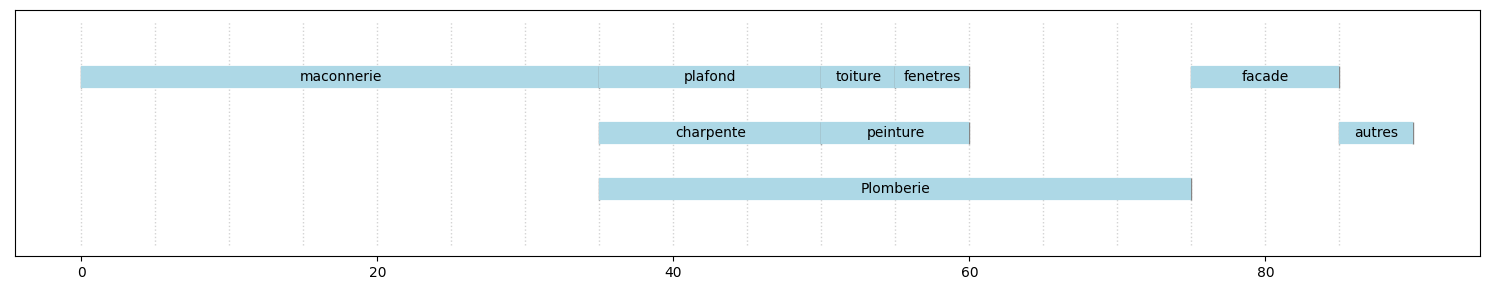

In [13]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On importe ces libs spéciales pour ce type d'optimisations Gestion projet/Schedule
import sys
from docplex.cp.model import *

# On crée notre modèle
model = Model(name='minimisation_temps_execution', log_output=True)
model = CpoModel()


# On crée nos variables de décision
maconnerie = model.interval_var(size=35)
charpente = model.interval_var(size=15)
Plomberie = model.interval_var(size=40)
plafond = model.interval_var(size=15)
toiture = model.interval_var(size=5)
peinture = model.interval_var(size=10)
fenetres = model.interval_var(size=5)
facade = model.interval_var(size=10)
jardin = model.interval_var(size=5)
autres = model.interval_var(size=5)

# Précédence
model.add( model.end_before_start(maconnerie, charpente) )
model.add( model.end_before_start(maconnerie, Plomberie) )
model.add( model.end_before_start(maconnerie, plafond) )
model.add( model.end_before_start(charpente, toiture) )
model.add( model.end_before_start(plafond, peinture) )
model.add( model.end_before_start(toiture, fenetres) )
model.add( model.end_before_start(toiture, facade) )
model.add( model.end_before_start(Plomberie, facade) )
model.add( model.end_before_start(toiture, jardin) )
model.add( model.end_before_start(Plomberie, jardin) )
model.add( model.end_before_start(fenetres, autres) )
model.add( model.end_before_start(facade, autres) )
model.add( model.end_before_start(jardin, autres) )
model.add( model.end_before_start(peinture, autres) )

# Résoudre
print("\nSolving model....")
msol0 = model.solve( TimeLimit=10)
print("done")

var_sol = msol0.get_var_solution(maconnerie)
print("maconnerie : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(charpente)
print("charpente : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(Plomberie)
print("Plomberie : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(plafond)
print("plafond : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(toiture)
print("toiture : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(peinture)
print("peinture : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(fenetres)
print("fenetres : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(facade)
print("Facade : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(autres)
print("autres : {}..{}".format(var_sol.get_start(), var_sol.get_end()))


import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt
%matplotlib inline
#Change the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

wt = msol0.get_var_solution(maconnerie)   
visu.interval(wt, 'lightblue', 'maconnerie')   
wt = msol0.get_var_solution(charpente)   
visu.interval(wt, 'lightblue', 'charpente')
wt = msol0.get_var_solution(Plomberie)   
visu.interval(wt, 'lightblue', 'Plomberie')
wt = msol0.get_var_solution(plafond)   
visu.interval(wt, 'lightblue', 'plafond')
wt = msol0.get_var_solution(toiture)   
visu.interval(wt, 'lightblue', 'toiture')
wt = msol0.get_var_solution(peinture)   
visu.interval(wt, 'lightblue', 'peinture')
wt = msol0.get_var_solution(fenetres)   
visu.interval(wt, 'lightblue', 'fenetres')
wt = msol0.get_var_solution(facade)   
visu.interval(wt, 'lightblue', 'facade')
wt = msol0.get_var_solution(autres)   
visu.interval(wt, 'lightblue', 'autres')
visu.show()



# Solution avec Python 

On va utiliser le framework Python Mip ( Qui utilise Gurobi) et voir si on trouve le même résultat qu'avec Cplex, toujours pour le même problème .

https://docs.python-mip.com/en/latest/examples.html

Le modèle Python Mip comprends aussi les ressources, mais dans notre problème de base, on en a pas besoin.

On reprends donc notre problème, et on y ajoute les 2 tâches fictives nécessaires à Python Mip :



Nouveau : Suite à la nouvelle licence Gurobi, cela ne fonctionne plus, on choisit donc le solveur CBC.

<img src = "img/python-mip.png">

In [14]:
# - 0. Tâche fictive
# - 1. maconnerie =  temps : 35  
# - 2. charpente =   temps : 15  - Prédécesseurs : maçonnerie
# - 3. Plomberie =   temps : 40  - Prédécesseurs : maçonnerie
# - 4. plafond    =  temps : 15  - Prédécesseurs : maçonnerie
# - 5. toiture =     temps : 5   - Prédécesseurs : charpente
# - 6. peinture =    temps : 10  - Prédécesseurs : plafond
# - 7. fenetres =    temps : 5   - Prédécesseurs : toiture
# - 8. facade =      temps : 10  - Prédécesseurs : toiture,plomberie
# - 9. jardin =      temps : 5   - Prédécesseurs : toiture,plomberie
# - 10. autres =     temps : 5   - Prédécesseurs : fenetres,facade,jardin,peinture
# - 11. Tâche fictive

In [19]:
# n = Nombre de tâches plus 1 ( Celle de début et celle de fin 'fictives' mais nécessaires, celle de fin est déjà présente dans le fichier excel)
# p = Durée de chaque tâches
# u = Ressources nécessaires, dans ce problème il n'y en pas besoin.
# S = Successeurs
from itertools import product
from mip import Model, xsum, BINARY

# Note de Python Mip : note there will be exactly 20 jobs (n=18 jobs plus the  2 'dummy' one)
n = 10

# On entre donc la durée des tâches de notre projet 
p = [0, 35, 15, 40, 15, 5, 10, 5, 10, 5, 5, 0]  # J'ai rajouté la tâche dummy au début et à la fin " fin des travaux d'une durée de 0"

# Dans ce problème, il n'y a pas de contraintes de ressources, on les commente donc.
# quantité de ressource r requise pour le traitement de la tâche j
# u = [[0, 0], [5, 1], [0, 4], [1, 4], [1, 3], [3, 2], [3, 1], [2, 4],
#      [4, 0], [5, 2], [2, 5], [0, 0]]

# On récrée donc les successeurs de notre projet, à la manière de Python Mip:
S = [[0, 1],  [1, 2], [1, 3], [1, 4], [2, 5], [3, 5], [3, 8], [3, 9], [4, 6],
[5, 7], [5, 8], [5, 9], [6,10],[7, 10], [8,10], [9,10], [10,11],]

# successeurs des nodes [node, successeur] , On enlève les ressources parce qu'il n'y en a pas dans ce problème.
# (R, J, T) = (range(len(c)), range(len(p)), range(sum(p)))
(J, T) = (range(len(p)), range(sum(p)))

print(J)
print(T)

model = Model(sense="MINIMIZE", solver_name="CBC")

x = [[model.add_var(name="x({},{})".format(j, t), var_type=BINARY) for t in T] for j in J]

print(x)

model.objective = xsum(t * x[n + 1][t] for t in T)

for j in J:
    model += xsum(x[j][t] for t in T) == 1

# Ce code concerne les ressources, il est inutile dans ce cas.
# for (r, t) in product(R, T):
#     model += (
#         xsum(u[j][r] * x[j][t2] for j in J for t2 in range(max(0, t - p[j] + 1), t + 1))
#         <= c[r])

for (j, s) in S:
    model += xsum(t * x[s][t] - t * x[j][t] for t in T) >= p[j]

model.optimize()

print("Schedule: ")
for (j, t) in product(J, T):
    if x[j][t].x >= 0.99:
        print("Job {}: begins at t={} and finishes at t={}".format(
            j, t, t+p[j]))
print("Makespan = {}".format(model.objective_value))

range(0, 12)
range(0, 145)
[[<mip.entities.Var object at 0x0000026009965730>, <mip.entities.Var object at 0x00000260098E0A90>, <mip.entities.Var object at 0x00000260098E0B20>, <mip.entities.Var object at 0x00000260098E0AC0>, <mip.entities.Var object at 0x00000260098E0C40>, <mip.entities.Var object at 0x00000260098E0F10>, <mip.entities.Var object at 0x00000260098E09A0>, <mip.entities.Var object at 0x00000260098E0DC0>, <mip.entities.Var object at 0x00000260098E0DF0>, <mip.entities.Var object at 0x00000260098E0E50>, <mip.entities.Var object at 0x00000260098E0BE0>, <mip.entities.Var object at 0x00000260098E0D60>, <mip.entities.Var object at 0x00000260098E0E80>, <mip.entities.Var object at 0x00000260098E0A00>, <mip.entities.Var object at 0x00000260098E0F40>, <mip.entities.Var object at 0x00000260098E0EE0>, <mip.entities.Var object at 0x00000260098E0D90>, <mip.entities.Var object at 0x00000260098E0CD0>, <mip.entities.Var object at 0x00000260098E0D30>, <mip.entities.Var object at 0x0000026009

# avec Python Pulp

Là, on arrive dans les choses sérieuses, Il n'existe pas d'exemple sur internet et on a que le modèle mathématique à peu prêt , et l'exemple de Christian Prins sous excel pour tenter de créer un code Pulp de minimisation de temps de projet.

Tentative de création et compréhension en cours ...

In [16]:
# Import
from pulp import *

# Note de Python Mip : note there will be exactly 20 jobs (n=18 jobs plus the  2 'dummy' one)
n = 10

# On entre donc la durée des tâches de notre projet 
p = [0, 35, 15, 40, 15, 5, 10, 5, 10, 5, 5, 0]  # J'ai rajouté la tâche dummy au début et à la fin " fin des travaux d'une durée de 0"

# On récrée donc les successeurs de notre projet, à la manière de Python Mip:
S = [[0, 1],  [1, 2], [1, 3], [1, 4], [2, 5], [3, 5], [3, 8], [3, 9], [4, 6],
[5, 7], [5, 8], [5, 9], [6,10],[7, 10], [8,10], [9,10], [10,11],]

(J, T) = (range(len(p)), range(sum(p)))



# Créer un programme linéaire de maximisation
Probleme = LpProblem('minimisation_temps_projet', LpMinimize)  

# Créer les variables du problème, 
x = [[model.add_var(name="x({},{})".format(j, t), var_type=BINARY) for t in T] for j in J]

# Ecrire la fonction objectif 
Probleme +=   lpSum([t * x[n + 1][t] for t in T])

# Les contraintes : 


# Résoudre
Probleme.solve()

# On imprime les variables qui ont leur valeur optimisées
for v in Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Probleme.objective))



AttributeError: 'CpoModel' object has no attribute 'add_var'